# SVM Salary Data Train

In [1]:
# Importig Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler



from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report



In [2]:
# Loading data
train_data = pd.read_csv('SalaryData_Train(1).csv')
test_data = pd.read_csv('SalaryData_Test(1).csv')

In [3]:
train_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
test_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [5]:
# Checking for null values
train_data.isna().sum().sum()

0

In [6]:
# Checking for null values
test_data.isna().sum().sum()

0

In [22]:
corr1 = train_data.corr()

<AxesSubplot:>

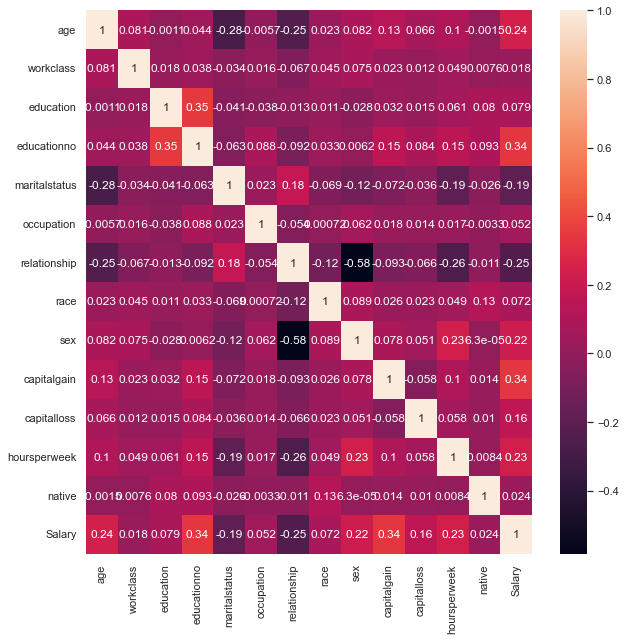

In [23]:
plt.figure(figsize=(10,10))
sns.heatmap(corr1,annot=True)

In [24]:
corr2 = test_data.corr()

<AxesSubplot:>

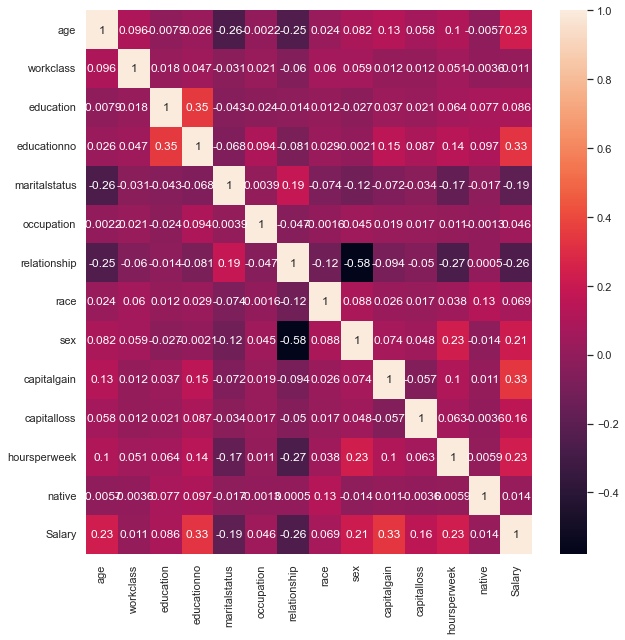

In [27]:
plt.figure(figsize=(10,10))
sns.heatmap(corr2,annot=True)

In [7]:
train_data.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

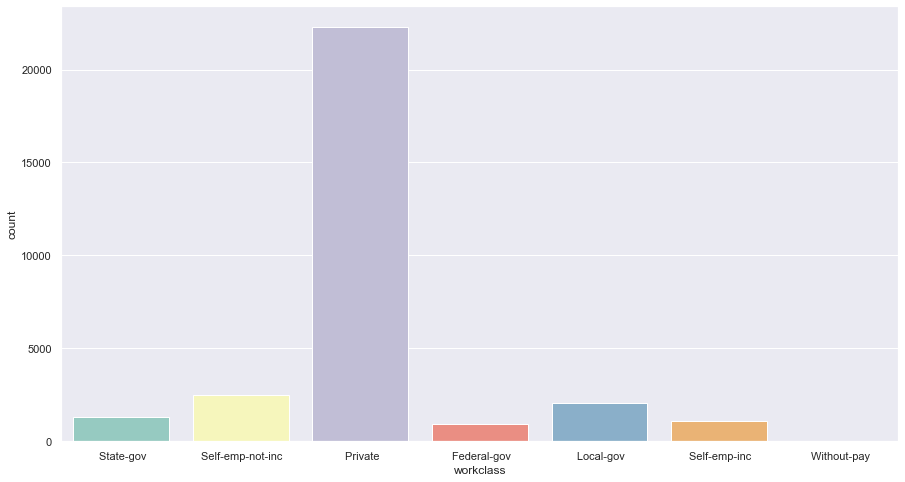

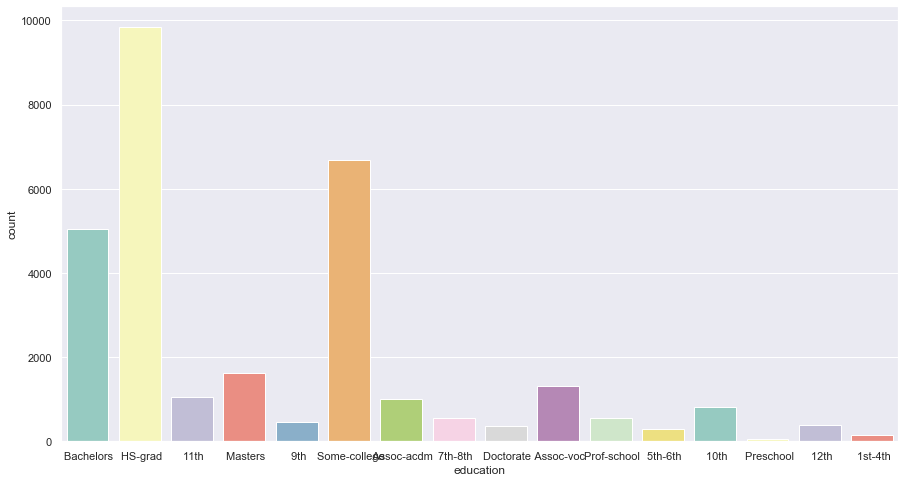

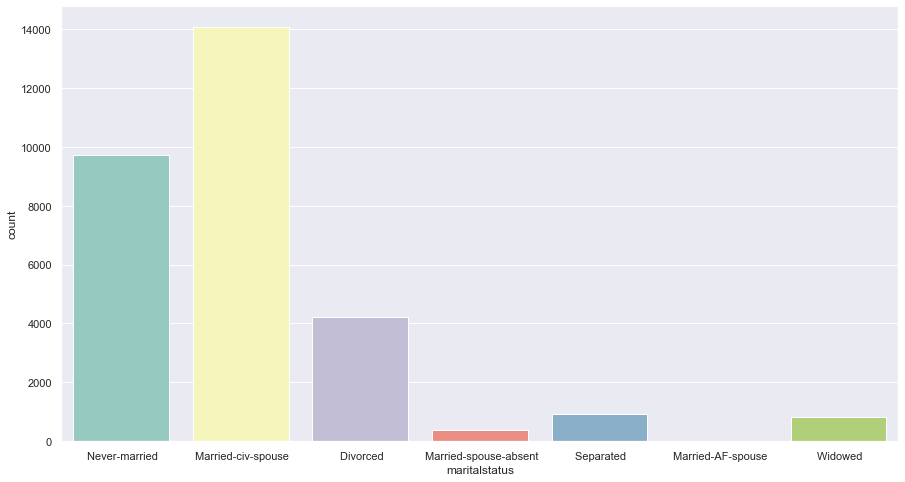

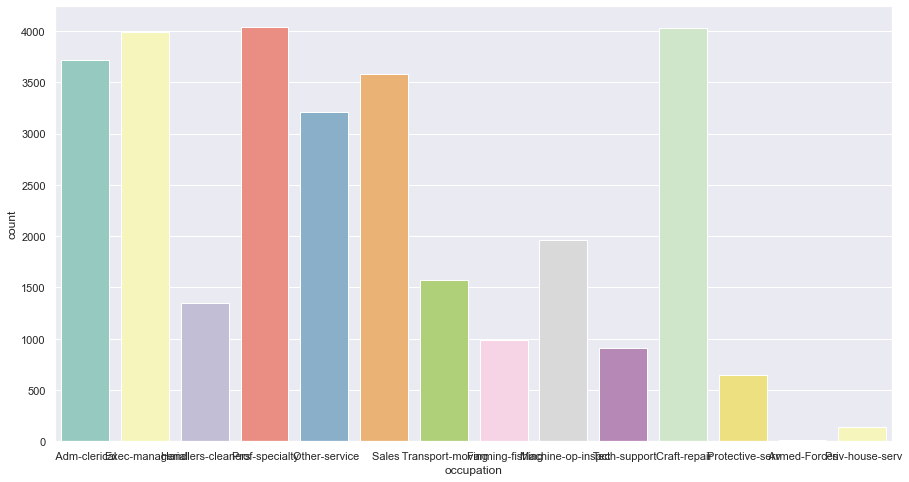

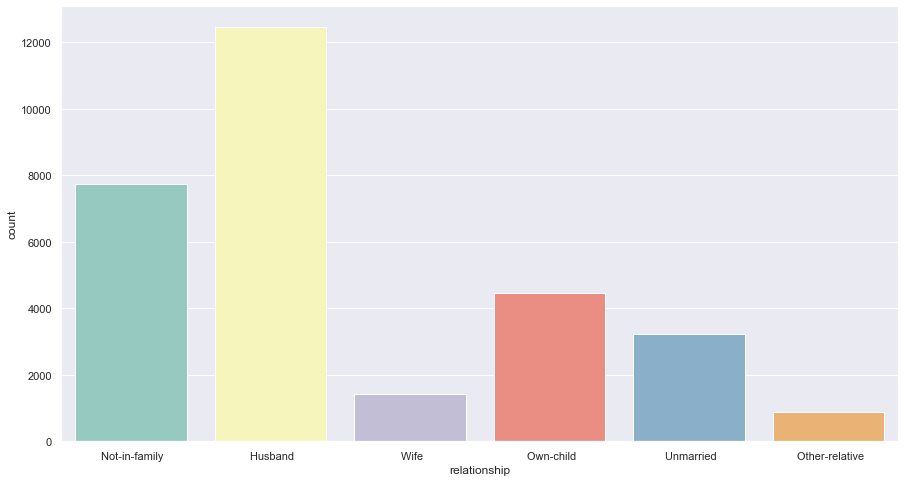

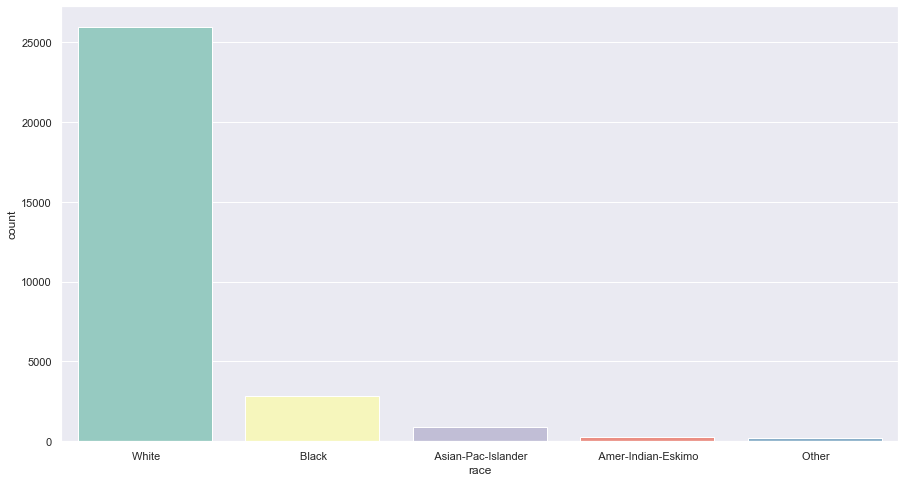

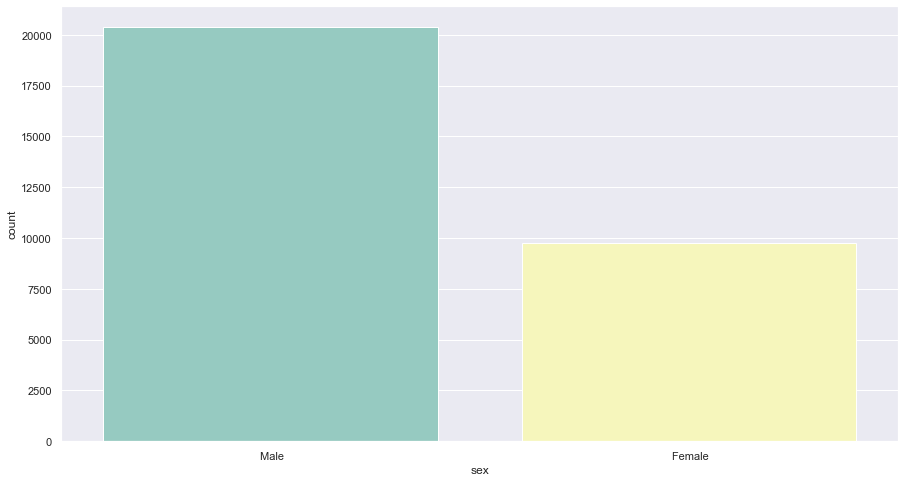

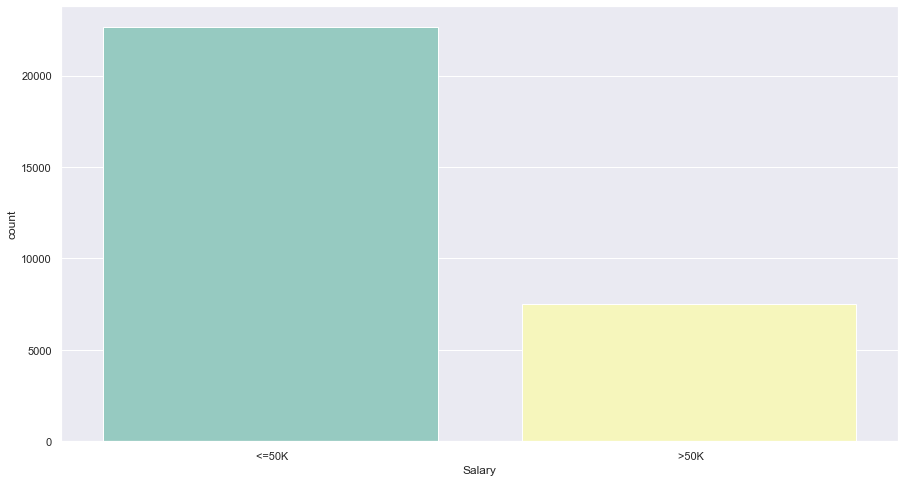

In [8]:
# countplot for all categorical columns
import seaborn as sns
sns.set(rc={'figure.figsize':(15,8)})
cat_col = ['workclass', 'education','maritalstatus', 'occupation', 'relationship', 'race', 'sex','Salary']
for col in cat_col:
    plt.figure() 
    sns.countplot(x = col, data = train_data, palette = 'Set3');

In [9]:
train_data[['Salary', 'age']].groupby(['Salary'], as_index=False).mean().sort_values(by='age', ascending=False)

,Salary,age
1,>50K,43.959110
0,<=50K,36.608264


# Feature encoding

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
train_data = train_data.apply(LabelEncoder().fit_transform)
train_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,22,5,9,12,4,0,1,4,1,24,0,39,37,0
1,33,4,9,12,2,3,0,4,1,0,0,12,37,0
2,21,2,11,8,0,5,1,4,1,0,0,39,37,0
3,36,2,1,6,2,5,0,2,1,0,0,39,37,0
4,11,2,9,12,2,9,5,2,0,0,0,39,4,0


In [12]:
test_data = test_data.apply(LabelEncoder().fit_transform)
test_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,8,2,1,6,4,6,3,2,1,0,0,39,37,0
1,21,2,11,8,2,4,0,4,1,0,0,49,37,0
2,11,1,7,11,2,10,0,4,1,0,0,39,37,1
3,27,2,15,9,2,6,0,2,1,87,0,39,37,1
4,17,2,0,5,4,7,1,4,1,0,0,29,37,0


In [13]:
drop_elements = ['education', 'native', 'Salary']
X = train_data.drop(drop_elements, axis=1)

In [14]:
y = train_data['Salary']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# SVM Model

In [17]:
from sklearn import metrics

svc = SVC()
svc.fit(X_train, y_train)
# make predictions
prediction = svc.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))



              precision    recall  f1-score   support

           0       0.80      0.99      0.89      7466
           1       0.86      0.28      0.42      2488

    accuracy                           0.81      9954
   macro avg       0.83      0.63      0.65      9954
weighted avg       0.82      0.81      0.77      9954

[[7355  111]
 [1789  699]]


# Checking accuracy for test data

In [19]:
drop_elements = ['education', 'native', 'Salary']
X_new = test_data.drop(drop_elements, axis=1)

y_new = test_data['Salary']

In [21]:

new_prediction = svc.predict(X_new)

print(metrics.classification_report(y_new, new_prediction))
print(metrics.confusion_matrix(y_new, new_prediction))



              precision    recall  f1-score   support

           0       0.80      0.99      0.89     11360
           1       0.87      0.26      0.40      3700

    accuracy                           0.81     15060
   macro avg       0.84      0.63      0.65     15060
weighted avg       0.82      0.81      0.77     15060

[[11216   144]
 [ 2727   973]]
